# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.79M/6.79M [00:00<00:00, 16.3MB/s]


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
sp = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
results = sp.find('table', class_='table')

# Extract all the headers
headers = sp.find_all('th')

# Extract all the rows
info = sp.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
table_headers = []
id = []
terrestrial_date = []
sol = []
ls = []
month = []
min_temp = []
pressure = []

# Loop through the scraped data to create a list of rows
# Retrieve and append all table headers
for header in headers:
    table_headers.append(header.text)
    
# retrieve all data
for i in info:
    
    # retrieve and append id
    mars_id = i.find('td')
    id.append(int(mars_id.text))
    
    # retrieve and append terrestial dates
    terrestrial_date.append(mars_id.find_next_sibling('td').text)
    mars_id = mars_id.find_next_sibling('td')
    
    # retrieve and append sol
    sol.append(int(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # retrieve and append ls
    ls.append(int(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling('td')
    
    # retrieve and append month
    month.append(int(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # retrieve and append min_temp
    min_temp.append(float(mars_id.find_next_sibling("td").text))
    mars_id = mars_id.find_next_sibling("td")
    
    # retrieve and append pressure
    pressure.append(float(mars_id.find_next_sibling("td").text))


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(columns = table_headers)
mars_df["id"] = id
mars_df["terrestrial_date"] = terrestrial_date
mars_df["sol"] = sol
mars_df["ls"] = ls
mars_df["month"] = month
mars_df["min_temp"] = min_temp
mars_df["pressure"] = pressure

In [8]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [10]:
# Change data types for data analysis
mars_df = mars_df.astype({'terrestrial_date':'datetime64'})

In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?

number_of_months = mars_df['month'].nunique()
months =  mars_df.groupby('month')['id'].nunique()

print(f"There are {number_of_months} months on Mars.")
print(f"The following are the {number_of_months} months with the number of occurences in the dataset:")
print(months)

There are 12 months on Mars.
The following are the 12 months with the number of occurences in the dataset:
month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: id, dtype: int64


In [13]:
# 2. How many Martian days' worth of data are there?

data_days = mars_df['sol'].nunique()
print(f"There are {data_days} Martian days' worth of data in the dataset.")

There are 1867 Martian days' worth of data in the dataset.


In [14]:
# 3. What is the average low temperature by month?

average_low_temp = mars_df.groupby('month')['min_temp'].mean()
average_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

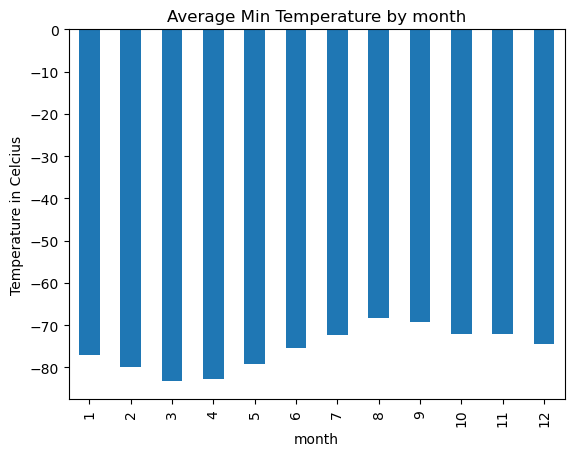

In [15]:
# Plot the average temperature by month

average_low_temp.plot(kind="bar", ylabel="Temperature in Celcius", title="Average Min Temperature by month")
plt.show()

The coldest and hottest months in Curiosity's location are 3 and 8 respectively.


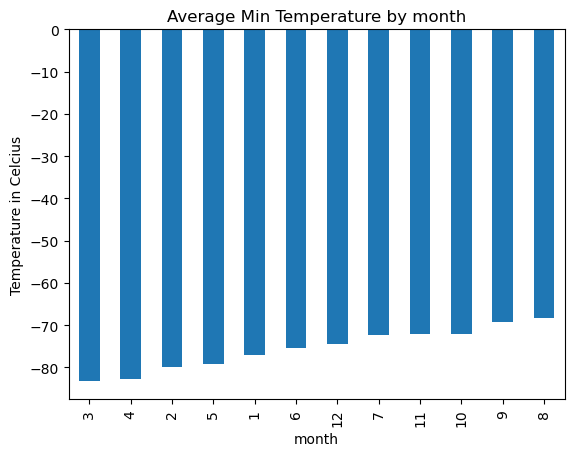

In [16]:
# Identify the coldest and hottest months in Curiosity's location

average_low_temp_sorted = average_low_temp.sort_values()

coldest_month = average_low_temp_sorted.index[0]
hottest_month = average_low_temp_sorted.index[-1]

print(f"The coldest and hottest months in Curiosity's location are {coldest_month} and {hottest_month} respectively.")

average_low_temp_sorted.plot(kind="bar", ylabel="Temperature in Celcius", title="Average Min Temperature by month")
plt.show()

In [17]:
# 4. Average pressure by Martian month

average_pressure = mars_df.groupby('month')['pressure'].mean()
average_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

The months with the lowest and highest atmospheric pressure are 6 and 9 respectively.


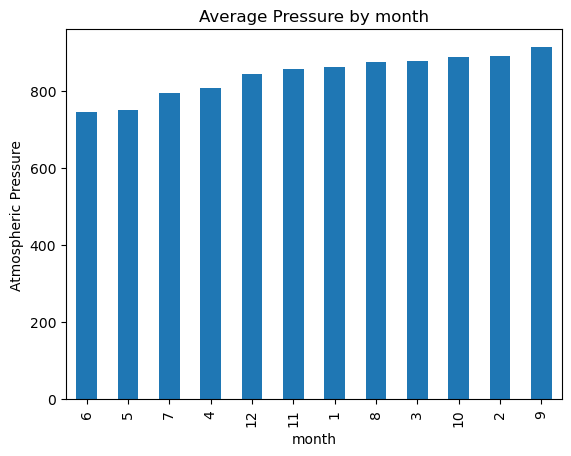

In [18]:
# Plot the average pressure by month
average_pressure_sorted = average_pressure.sort_values()

lowest_pressure = average_pressure_sorted.index[0]
highest_pressure = average_pressure_sorted.index[-1]

print(f"The months with the lowest and highest atmospheric pressure are {lowest_pressure} and {highest_pressure} respectively.")

average_pressure_sorted.plot(kind="bar", ylabel="Atmospheric Pressure", title="Average Pressure by month")
plt.show()

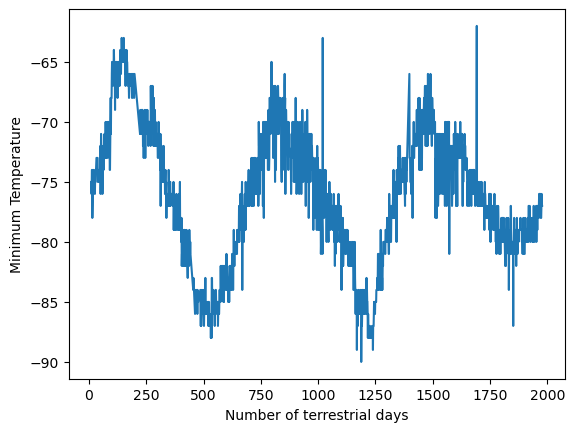

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
x = mars_df['sol']
y = mars_df['min_temp']
plt.plot(x, y)
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')
plt.show()

In [20]:
mars_min_temp = mars_df[['min_temp', 'sol']]
mars_min_temp

,min_temp,sol
0,-75.0,10
1,-76.0,11
2,-76.0,12
3,-74.0,13
4,-74.0,14
...,...,...
1862,-78.0,1973
1863,-77.0,1974
1864,-76.0,1975
1865,-77.0,1976


In [21]:
mars_min_temp_sorted = mars_min_temp.sort_values('min_temp', ascending=False)
mars_min_temp_sorted.head(10)

,min_temp,sol
1582,-62.0,1692
926,-63.0,1020
138,-63.0,152
129,-63.0,143
95,-64.0,109
150,-64.0,164
143,-64.0,157
141,-64.0,155
136,-64.0,150
131,-64.0,145


In [22]:
days_in_mars_year = mars_min_temp_sorted.index[0] - mars_min_temp_sorted.index[1]

conclusion = (
    f"Considering the fact that temperature reaches the peak every year, the data is sorted to pick up peak temperatures. The solar days (sol) between the top two peak temperatures is considered to be a year roughly."
    f" Here, the top two peak temperatures are on sols {mars_min_temp_sorted.index[0]} and {mars_min_temp_sorted.index[1]} respectively."
    f" The difference between these two days is {days_in_mars_year}. So, the assumption made from the data is that a Mars year is roughly about {days_in_mars_year} earth days."
    f" A quick internet search confirms that a Mars year is 687 earth days long."
)    
print(conclusion)

Considering the fact that temperature reaches the peak every year, the data is sorted to pick up peak temperatures. The solar days (sol) between the top two peak temperatures is considered to be a year roughly. Here, the top two peak temperatures are on sols 1582 and 926 respectively. The difference between these two days is 656. So, the assumption made from the data is that a Mars year is roughly about 656 earth days. A quick internet search confirms that a Mars year is 687 earth days long.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
csv_file = "./output_files/mars_data.csv"

mars_df.to_csv(csv_file, header=True, index=False)

In [24]:
browser.quit()